# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
'''%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()'''

In [6]:
athletes = pd.read_csv("athletes.csv")

In [7]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [43]:
# Sua análise começa aqui.
height_sample = get_sample(athletes, 'height', 3000)
sct.shapiro(height_sample)[1]

5.681722541339695e-07

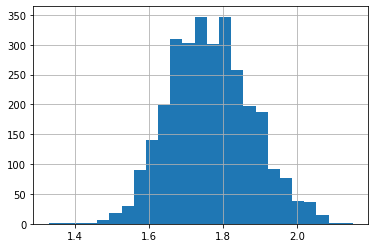

In [16]:
height_sample.hist(bins=25)
plt.show()

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [14]:
def q1():
    height_sample = get_sample(athletes, 'height', 3000)
    return bool(sct.shapiro(height_sample)[1] > 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

In [17]:
sct.jarque_bera(height_sample)

Jarque_beraResult(statistic=13.03363513594265, pvalue=0.001478366424594868)

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [18]:
def q2():
    height_sample = get_sample(athletes, 'height', 3000)
    return bool(sct.jarque_bera(height_sample)[1] > 0.05)

__Para refletir__:

* Esse resultado faz sentido?

In [19]:
weight_sample = get_sample(athletes, 'weight', 3000)
sct.normaltest(weight_sample)

NormaltestResult(statistic=510.24655809881176, pvalue=1.5898922918029537e-111)

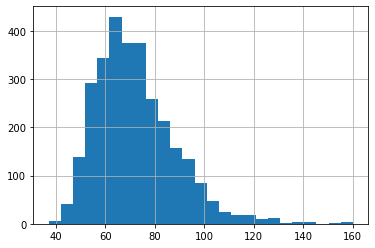

In [22]:
weight_sample.hist(bins=25)
plt.show()

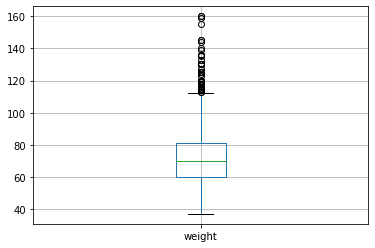

In [24]:
pd.DataFrame(weight_sample).boxplot()
plt.show()

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [20]:
def q3():
    weight_sample = get_sample(athletes, 'weight', 3000)
    return bool(sct.normaltest(weight_sample)[1] > 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

In [26]:
log_weight_sample = np.log(get_sample(athletes, 'weight', 3000))
sct.normaltest(log_weight_sample)[1]

1.0705572101256944e-10

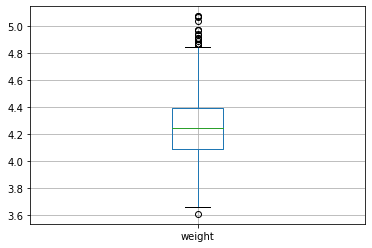

In [29]:
df_log_weight = pd.DataFrame(log_weight_sample)
#df_log_weight.hist(bins=25)
df_log_weight.boxplot()
plt.show()

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [9]:
def q4():
    log_weight_sample = np.log(get_sample(athletes, 'weight', 3000))
    return bool(sct.normaltest(log_weight_sample)[1] > 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

In [40]:
bra = athletes[athletes['nationality'] == 'BRA']
can = athletes[athletes['nationality'] == 'CAN']
usa = athletes[athletes['nationality'] == 'USA']
feature = 'height'

print(sct.ttest_ind(bra[feature].dropna(), usa[feature].dropna(), equal_var=False, nan_policy='raise')[1] > 0.05,
sct.ttest_ind(bra[feature].dropna(), can[feature].dropna(), equal_var=False, nan_policy='raise')[1] > 0.05,
sct.ttest_ind(can[feature].dropna(), usa[feature].dropna(), equal_var=False, nan_policy='raise')[1] > 0.05)

True False True


## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [38]:
def q5():
    bra = athletes[athletes['nationality'] == 'BRA']
    usa = athletes[athletes['nationality'] == 'USA']
    feature = 'height'

    return bool(sct.ttest_ind(bra[feature].dropna(), usa[feature].dropna(), equal_var=False, nan_policy='raise')[1] > 0.05)

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [11]:
def q6():
    bra = athletes[athletes['nationality'] == 'BRA']
    can = athletes[athletes['nationality'] == 'CAN']
    feature = 'height'

    return bool(sct.ttest_ind(bra[feature].dropna(), can[feature].dropna(), equal_var=False, nan_policy='raise')[1] > 0.05)

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [12]:
def q7():
    usa = athletes[athletes['nationality'] == 'USA']
    can = athletes[athletes['nationality'] == 'CAN']
    feature = 'height'

    return float(round(sct.ttest_ind(usa[feature].dropna(), can[feature].dropna(), equal_var=False, nan_policy='raise')[1], 8))

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?